In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

from IPython.display import Audio

In [2]:
SR = 22050
DURATION = 4.

In [3]:
def gen_harmonic(n, sr=SR, duration=DURATION, f0=440):
    signal = np.sin(2*np.pi*np.arange(sr*duration)*(n+1)*f0/sr)
    return signal

In [4]:
def draw_spectrogram(signal, title, sr=SR, low_lim=0, high_lim=SR//2):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear', fmax=sr//2, x_axis='time')
    plt.title(title)
    plt.ylim([low_lim, high_lim])
    plt.colorbar()

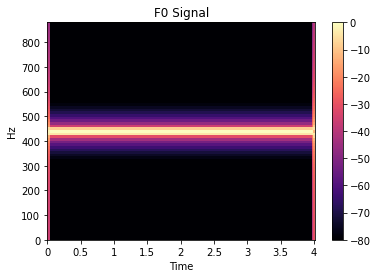

In [5]:
f0_signal = gen_harmonic(0)
draw_spectrogram(f0_signal, 'F0 Signal', high_lim=880)
Audio(f0_signal, rate=SR)

In [6]:
def amplitude(n, rate):
    A = np.exp(-n*rate)
    return A
    

def gen_complex(f0, n=10, decay=None):
    if decay is None:
        A = lambda x: 1
    else:
        A = lambda x: amplitude(x, rate=decay)
    
    signal = gen_harmonic(n=0, f0=f0)
    for i in range(1, n):
        signal += A(i) * gen_harmonic(n=i, f0=f0)
    return signal

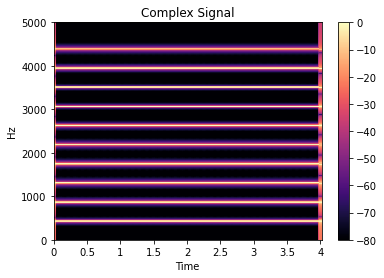

In [7]:
complex440 = gen_complex(440)
draw_spectrogram(complex440, 'Complex Signal', high_lim=5000)
Audio(complex440, rate=SR)

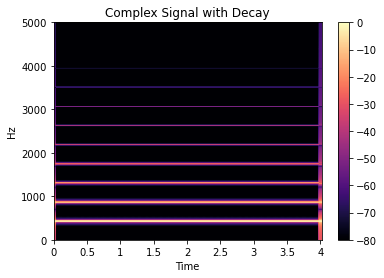

In [8]:
complex440decay = gen_complex(440, decay=1)
draw_spectrogram(complex440decay, 'Complex Signal with Decay', high_lim=5000)
Audio(complex440decay, rate=SR)

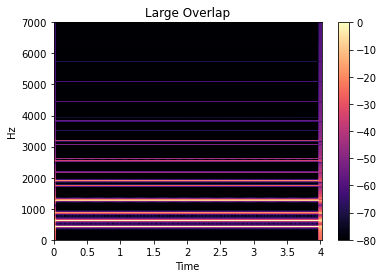

In [9]:
large_overlap = gen_complex(440, decay=1) + gen_complex(640, decay=1)
draw_spectrogram(large_overlap, 'Large Overlap', high_lim=7000)
Audio(large_overlap, rate=SR)

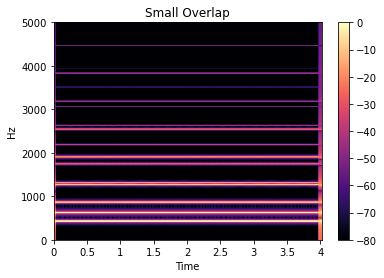

In [10]:
small_overlap = gen_complex(440, decay=1) + gen_complex(442, decay=1)
draw_spectrogram(large_overlap, 'Small Overlap', high_lim=5000)
Audio(large_overlap, rate=SR)

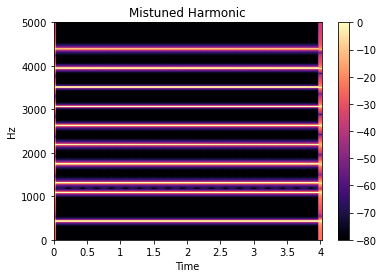

In [12]:
mistune = gen_complex(440, n=10) - gen_harmonic(1) + gen_harmonic(0, f0=440*2.5)
draw_spectrogram(mistune, 'Mistuned Harmonic', high_lim=5000)
Audio(mistune, rate=SR)

# Experiments

## Galloping

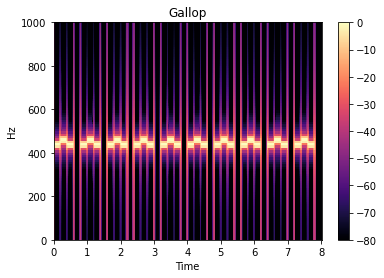

In [44]:
def gallop_signal(delta_f, f0=440, dur=0.2, repeat=10, sr=SR):
    signal_1 = gen_harmonic(0, f0=f0, duration=dur, sr=sr)
    signal_2 = gen_harmonic(0, f0=f0+delta_f, duration=dur, sr=sr)
    silence = np.zeros(int(dur*sr))
    gallop = np.concatenate([signal_1, signal_2, signal_1, silence])
    gallop_repeat = [gallop for _ in range(repeat)]
    signal = np.concatenate(gallop_repeat)
    return signal

gallop = gallop_signal(20)
draw_spectrogram(gallop, 'Gallop', low_lim=0, high_lim=1000)
Audio(gallop, rate=SR)

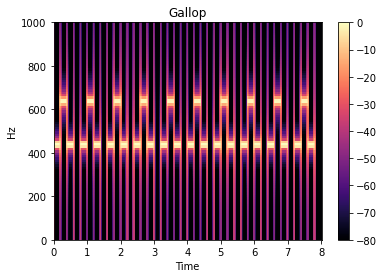

In [45]:
gallop = gallop_signal(200)
draw_spectrogram(gallop, 'Gallop', low_lim=0, high_lim=1000)
Audio(gallop, rate=SR)

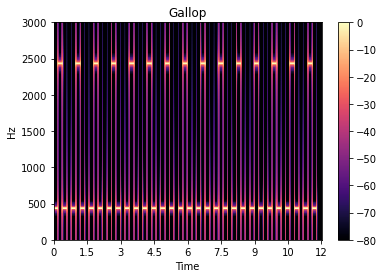

In [53]:
gallop = gallop_signal(2000, dur=0.2, repeat=15)
draw_spectrogram(gallop, 'Gallop', low_lim=0, high_lim=3000)
Audio(gallop, rate=72000)

## Onset

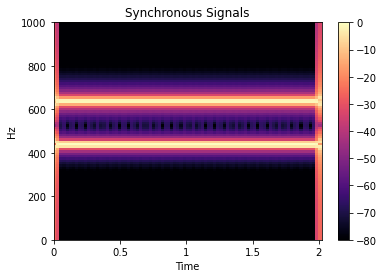

In [68]:
def overlap_async(async_, f0_1, f0_2, dur=4, sr=SR):
    signal_1 = gen_harmonic(0, f0=f0_1, duration=dur)
    signal_2 = gen_harmonic(0, f0=f0_2, duration=dur-2*async_)
    signal_2 = librosa.util.pad_center(signal_2, len(signal_1), mode='constant')
    signal = signal_1 + signal_2
    return signal
    
sync_signal = overlap_async(0, 440, 640, dur=2)
draw_spectrogram(sync_signal, 'Synchronous Signals', low_lim=0, high_lim=1000)
Audio(sync_signal, rate=SR)

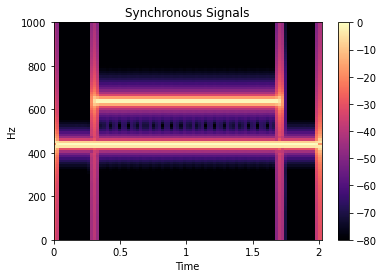

In [67]:
async_signal = overlap_async(0.3, 440, 640, dur=2)
draw_spectrogram(async_signal, 'Synchronous Signals', low_lim=0, high_lim=1000)
Audio(async_signal, rate=SR)

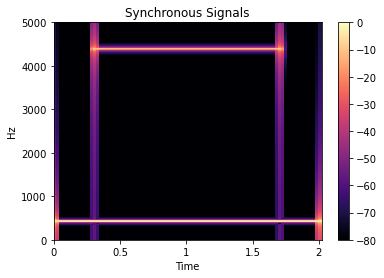

In [69]:
async_signal = overlap_async(0.3, 440, 4400, dur=2)
draw_spectrogram(async_signal, 'Synchronous Signals', low_lim=0, high_lim=5000)
Audio(async_signal, rate=SR)